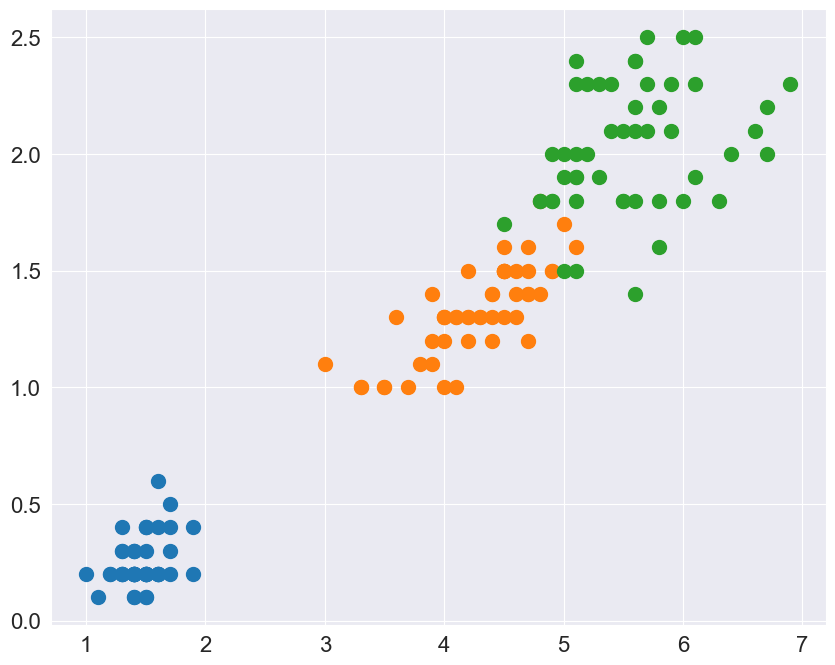

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:, 2:]
y = iris.target

plt.figure(figsize=(10, 8))
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.scatter(x[y==2, 0], x[y==2, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=9)
dt_clf.fit(x, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,9
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


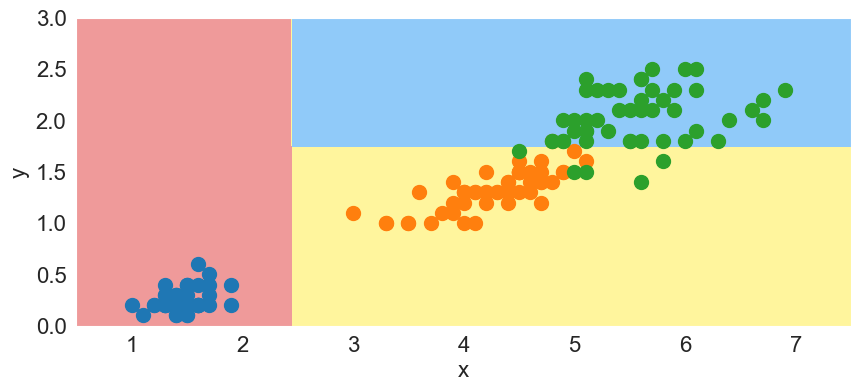

In [4]:
import numpy as np

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
plt.figure(figsize=(10, 4))    
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.scatter(x[y==2, 0], x[y==2, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

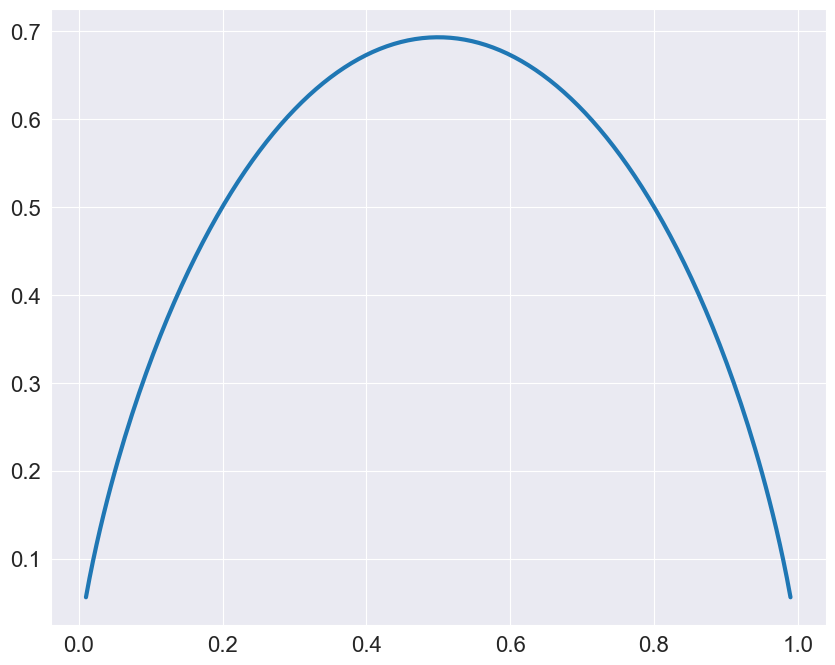

In [5]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

plt.figure(figsize=(10, 8))  
vals = np.linspace(0.01, 0.99, 200)
plt.plot(vals, entropy(vals), linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [6]:
def split(x, y, d, value):
    index_a = (x[:, d] <= value)
    index_b = (x[:, d] > value)
    return x[index_a], x[index_b], y[index_a], y[index_b]

In [7]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(x, y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(x.shape[1]):
        sorted_index = np.argsort(x[:, d])
        for i in range(1, len(x)):
            if x[sorted_index[i-1], d] != x[sorted_index[i], d]:
                v = (x[sorted_index[i-1], d] + x[sorted_index[i], d]) / 2
                x_l, x_r, y_l, y_r = split(x, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

best_entropy, best_d, best_v = try_split(x, y)
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.6931471805599453
best_d = 0
best_v = 2.45


In [8]:
x1_l, x1_r, y1_l, y1_r = split(x, y, best_d, best_v)
print(entropy(y1_l))
print(entropy(y1_r))

0.0
0.6931471805599453


In [9]:
best_entropy2, best_d2, best_v2 = try_split(x1_r, y1_r)
print("best_entropy =", best_entropy2)
print("best_d =", best_d2)
print("best_v =", best_v2)

best_entropy = 0.4132278899361904
best_d = 1
best_v = 1.75


In [10]:
x2_l, x2_r, y2_l, y2_r = split(x1_r, y1_r, best_d2, best_v2)
print(entropy(y2_l))
print(entropy(y2_r))

0.30849545083110386
0.10473243910508653


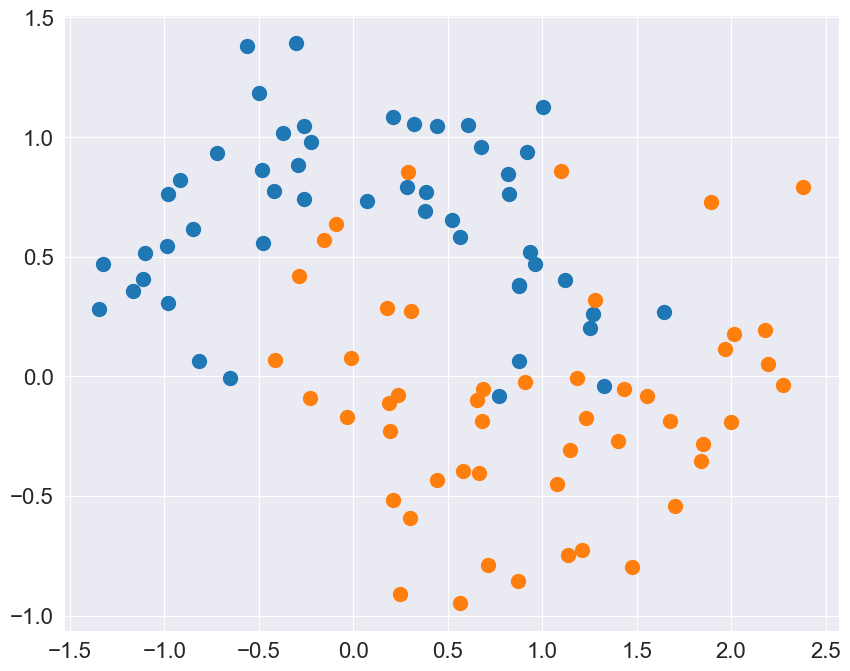

In [11]:
x, y = datasets.make_moons(noise=0.25, random_state=666)
plt.figure(figsize=(10, 8))
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

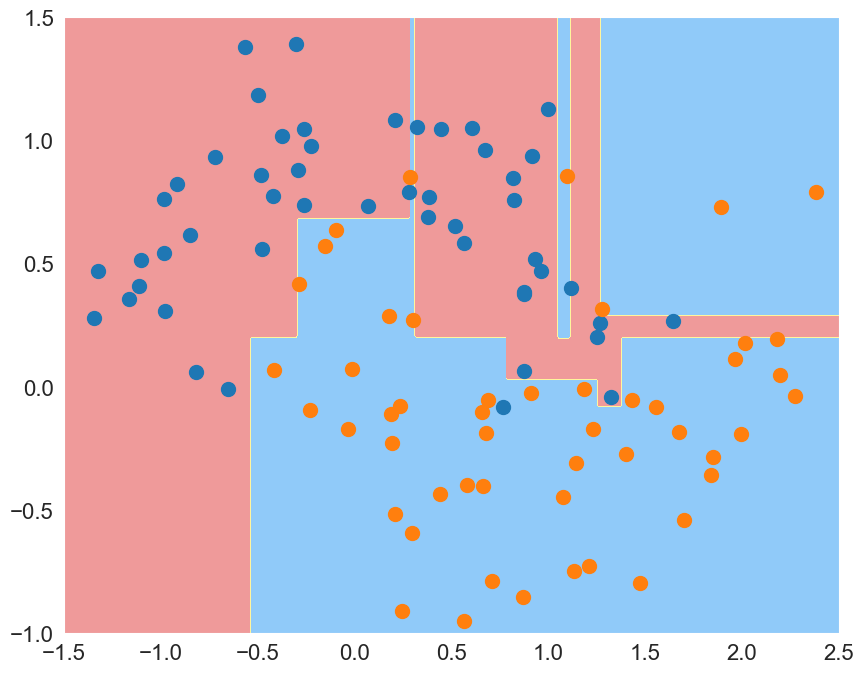

In [12]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x, y)

plt.figure(figsize=(10, 8))
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

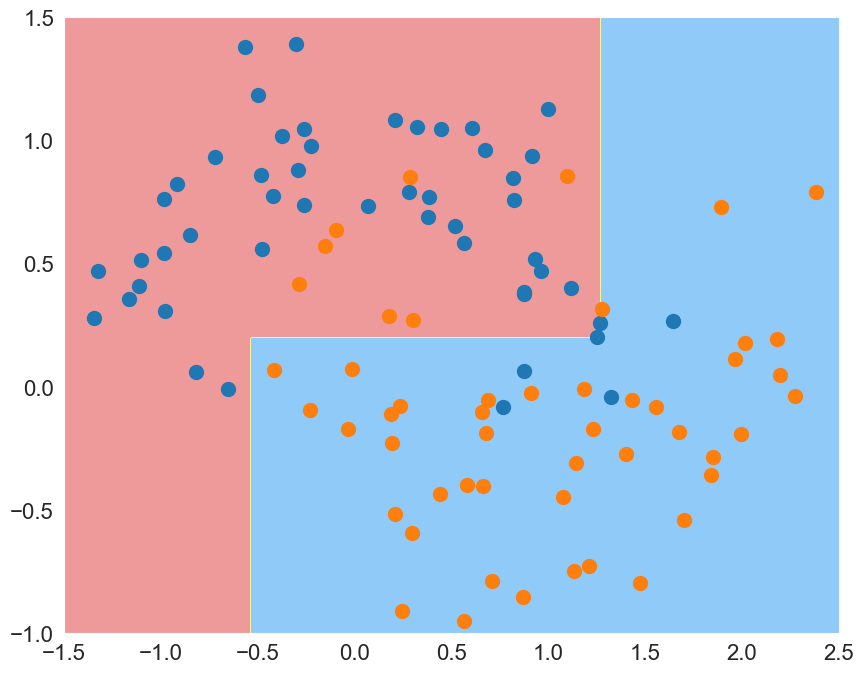

In [13]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(x, y)

plt.figure(figsize=(10, 8))
plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

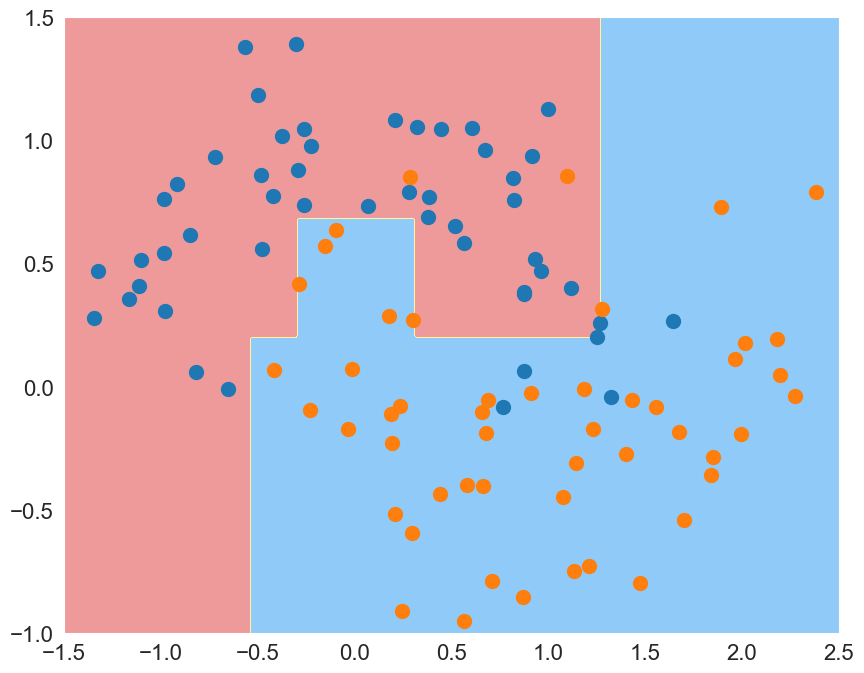

In [14]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(x, y)

plt.figure(figsize=(10, 8))
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

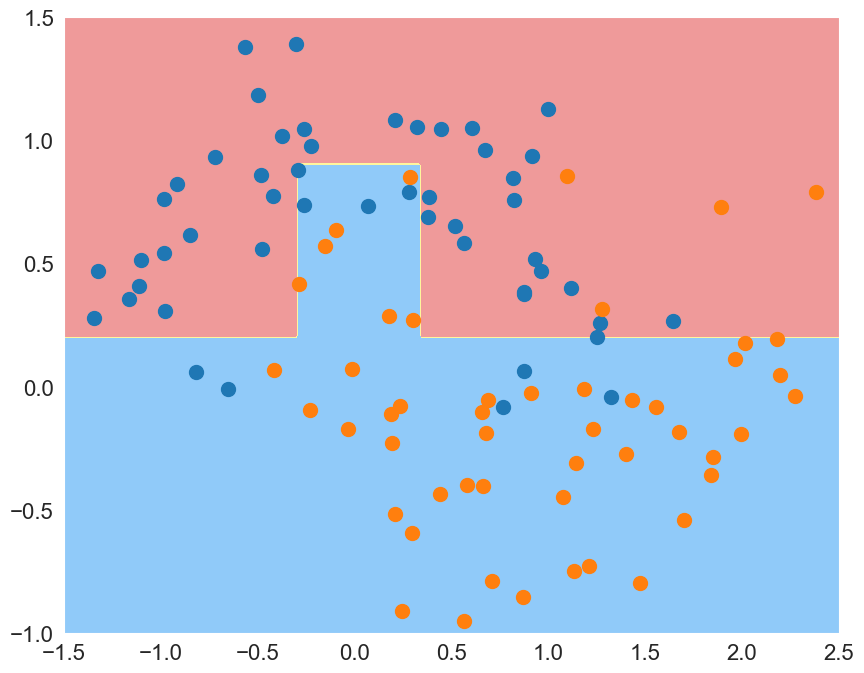

In [15]:
dt_clf5 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf5.fit(x, y)

plt.figure(figsize=(10, 8))
plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

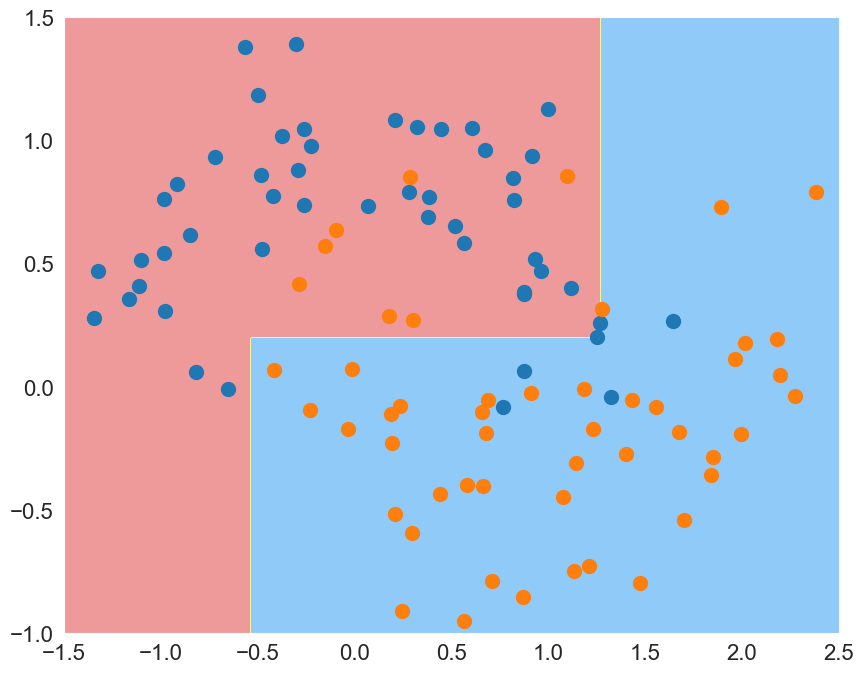

In [16]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(x, y)

plt.figure(figsize=(10, 8))
plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x[y==0, 0], x[y==0, 1], s=100)
plt.scatter(x[y==1, 0], x[y==1, 1], s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [17]:
digits = datasets.load_digits()
print(digits.DESCR)

x = digits.data
print(x.shape)
y = digits.target
print(y.shape)
print(digits.target_names)

print(y[100:110])
print(x[:1])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

0


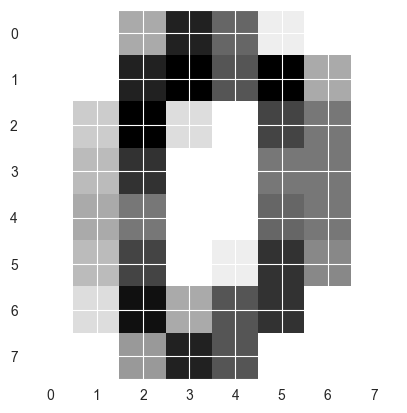

In [18]:
import matplotlib

some_digit = x[0]
print(y[0])
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# 3. 定义参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],   # 分裂准则
    'max_depth': [None, 5, 10, 15],     # 最大树深度
    'min_samples_split': [2, 5, 10],    # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4, 6],   # 叶节点最小样本数
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), param_grid,
    cv=5,                # 5折交叉验证               
    scoring='accuracy',  # 评估指标为准确率
    n_jobs=-1,           # 使用所有CPU核心
    verbose=1            # 输出详细信息
)

grid_search.fit(X_train, y_train)
print("\n最优参数: ", grid_search.best_params_)
print("5折交叉验证的最优得分: ", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits

最优参数:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
5折交叉验证的最优得分:  0.8594439605110337


In [20]:
from sklearn.metrics import classification_report, accuracy_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"测试集上的准确率: {test_accuracy:.4f}")

print("\n分类报告:")
print(classification_report(y_test, y_pred))

测试集上的准确率: 0.8889

分类报告:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28
           2       0.90      0.79      0.84        33
           3       0.91      0.85      0.88        34
           4       0.80      0.87      0.83        46
           5       0.96      0.96      0.96        47
           6       0.91      0.91      0.91        35
           7       0.83      0.88      0.86        34
           8       0.86      0.83      0.85        30
           9       0.88      0.90      0.89        40

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



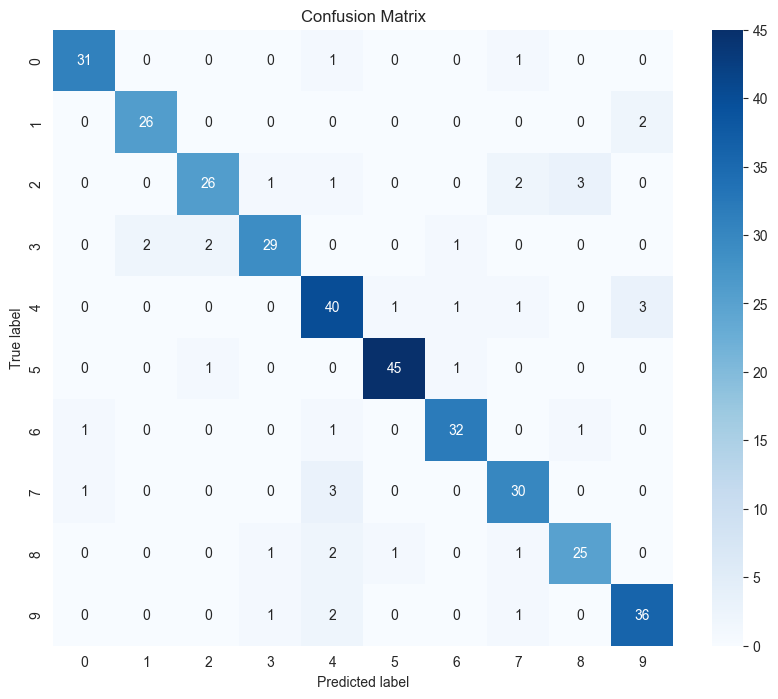

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names, 
            yticklabels=digits.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score

knn_clf = DecisionTreeClassifier(random_state=42)
score = cross_val_score(knn_clf, X_train, y_train, cv=5)
print(score)

[0.85763889 0.86458333 0.82578397 0.86759582 0.83972125]


In [33]:
from sklearn.tree import DecisionTreeRegressor

diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

dt_reg = DecisionTreeRegressor(max_depth=4, min_samples_split=4)
dt_reg.fit(x_train, y_train)
print(dt_reg.score(x_test, y_test))
print(dt_reg.score(x_train, y_train))

0.38620738699650103
0.5831651163356041
